# Data Visualisation

In [9]:
import numpy as np 
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_folder_name =  r"C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset" #change the path to fit your situation.

TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 198

dataset_dict = {
    'race_id': {
        0: 'white', 
        1: 'black', 
        2: 'asian', 
        3: 'indian', 
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}

dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['race_alias'] = dict((g, i) for i, g in dataset_dict['race_id'].items())

In [10]:
def parse_dataset(dataset_path, ext='jpg'):
    """
    Used to extract information about our dataset. It does iterate over all images and return a DataFrame with
    the data (age, gender and sex) of all files.
    """
    def parse_info_from_file(path):
        """
        Parse information from a single file
        """
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')

            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['race_id'][int(race)]
        except Exception as ex:
            return None, None, None
        
    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))
    
    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)
        
    df = pd.DataFrame(records)
    df['file'] = files
    df.columns = ['age', 'gender', 'race', 'file']
    df = df.dropna()
    
    return df

In [11]:
df = parse_dataset(dataset_folder_name)
df.sample(10)

,age,gender,race,file
7636,26.0,female,asian,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
17618,48.0,male,white,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
8215,27.0,male,white,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
5266,25.0,male,white,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
14213,36.0,male,indian,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
19760,55.0,female,indian,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
6713,26.0,male,indian,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
6119,26.0,male,white,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
24069,9.0,male,asian,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...
1541,19.0,female,white,C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...


In [12]:
import plotly.graph_objects as go
from IPython.display import display, Image

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
        
    img_bytes = fig.to_image(format="png")
    display(Image(img_bytes))

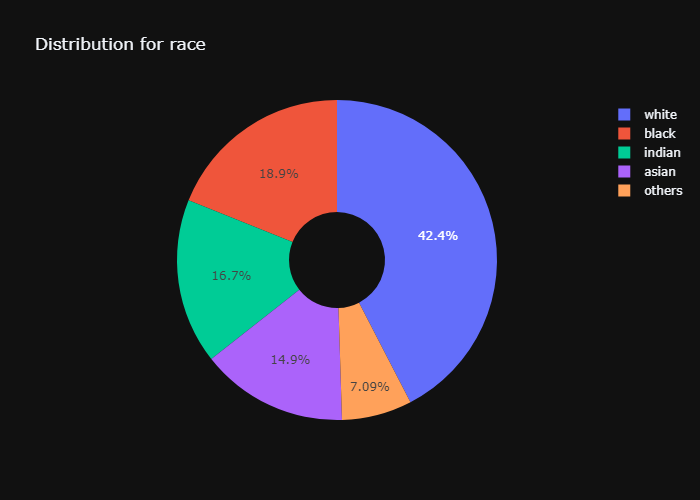

In [13]:
plot_distribution(df['race'])

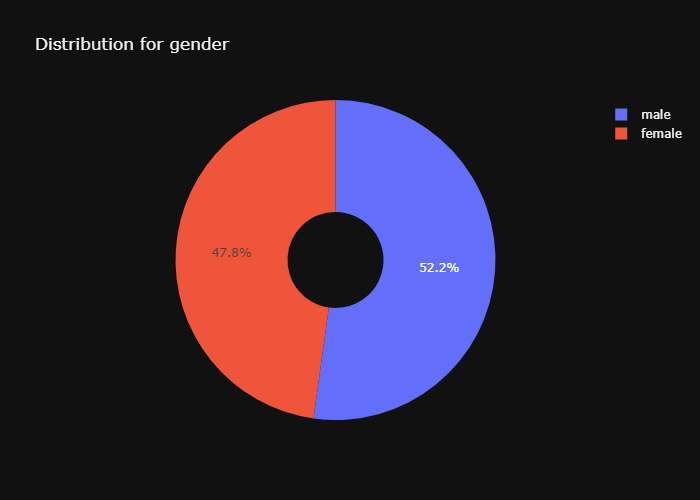

In [14]:
plot_distribution(df['gender'])

In [15]:
import plotly.express as px
fig = px.histogram(df, x="age", nbins=20)
fig.update_layout(title_text='Age distribution')
fig.show()

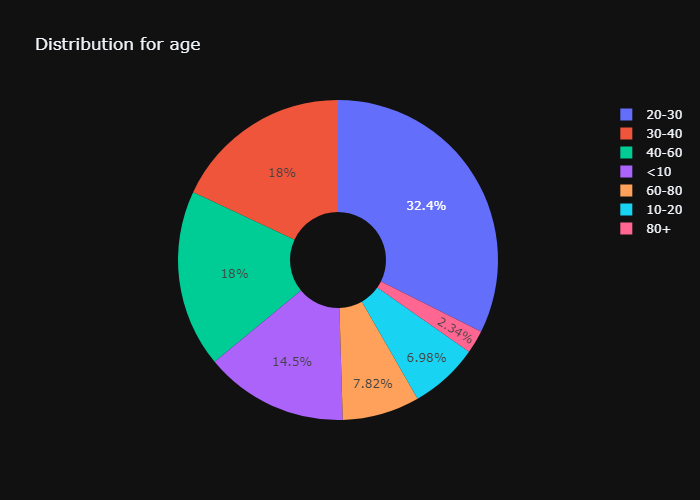

In [16]:
bins = [0, 10, 20, 30, 40, 60, 80, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-60', '60-80', '80+']

age_binned = pd.cut(df['age'], bins, labels=names)
plot_distribution(age_binned)